In [179]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [180]:
L = 4
dx = 0.1
xspan = np.linspace(-L,L,81)
N = len(xspan - 2)
K = 1

In [181]:
eigFunc = np.zeros((N,5))
eigVals = np.zeros(5)

In [182]:
def init_matrix(K, xspan, dx):
    N = len(xspan)
    A = np.zeros((N,N))
    for i, x in enumerate(xspan[:N-1]):
        A[i, i+1] = 1 # upper diag coeff for phi(n+1)
        A[i, i] = -2 - K*(x*x)*(dx*dx) # main diag coeff for phi(n)
        A[i, i-1] = 1 # lower diag coeff for phi(n-1)
    
    return A

In [183]:
def left_bdry_cond(A):
    A[0,0] += 4/3
    A[0,1] -= 1/3

    return A 

In [184]:
def right_bdry_cond(A):
    A[-1,-1] -=4/3
    A[-1,-2] += 1/3

    return A

In [185]:
def solve_for_eigenvalues(A):
    D, V = np.linalg.eig(-A)
    return D, V

In [186]:
def normalize_eigenfunctions(eigfunc, xspan):
    for i in range(eigfunc.shape[1]):
        norm = np.trapz(eigfunc[:, i] ** 2, xspan)
        eigfunc[:, i] = np.abs(eigfunc[:, i]) / np.sqrt(norm)
    
    return eigfunc

In [187]:
A = init_matrix(K, xspan, dx)
A = left_bdry_cond(A)
A = right_bdry_cond(A)

D, V = solve_for_eigenvalues(A)

In [188]:
sorted_indices = np.argsort(D)
D = D[sorted_indices]
V = V[:, sorted_indices]

eigFunc = normalize_eigenfunctions(V[:, :5], xspan)
eigVals = np.sort(D[:5] / (dx ** 2))

A3 = eigFunc.real
A4 = eigVals.real

np.save("A3.npy", A3)
np.save("A4.npy", A4)

/opt/anaconda3/envs/amath581hwenv/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/amath581hwenv/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


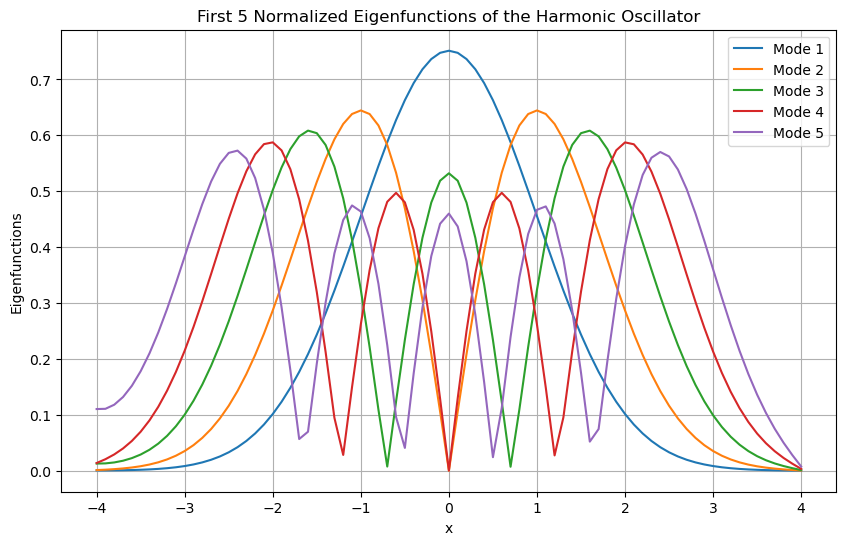

In [189]:
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(xspan, eigFunc[:, i], label=f'Mode {i+1}')
plt.title('First 5 Normalized Eigenfunctions of the Harmonic Oscillator')
plt.xlabel('x')
plt.ylabel('Eigenfunctions')
plt.legend()
plt.grid(True)
plt.show()